<img src="./images/galvanize-logo.png" alt="galvanize-logo" align="center" style="width: 200px;"/>

<hr />

## NumPy: High performance scientific computing in Python

## Learning Objectives

* Compare and Contrast numpy arrays to python lists

* Be able to use numpy slicing, indexing, and boolean indexing operations

* Identify numpy arrays and matrices and their linear algebra counterparts

* Use numpy broadcasting with arrays (vectors and matrices)

* Use numpy to perform mathematical operations such aggregations and matrix multiplication

Read the objectives

## NumPy: Efficient Array Compuation in Python

**Numpy** is the library behind almost all of the numerical and scientific computing in python.  It's quite true that if it were not for numpy, Python would not be a player in the data science world.

**Note**: It's pronounced **num-pie** as in **pie-thon**, not **num-pee**.

Numpy's major feature is its `array` data type (technically, it's called an `ndarray`, but everyone just calls them arrays).

Numpy arrays, on the face of it, look a lot like python lists:

In [4]:
import numpy as np
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

And you can do pretty much anything to a numpy array that you could do to a list, e.g.
#### slicing and indexing

In [5]:
# grab the item at index 2
x[2]

2

In [6]:
# grab the first 5 items
x[:5]

array([0, 1, 2, 3, 4])

In [7]:
# grab the items between index 1 and 8, counting by 2s
x[1:8:2]

array([1, 3, 5, 7])

In [8]:
# replace the item at index 0
x[0] = 100
x

array([100,   1,   2,   3,   4,   5,   6,   7,   8,   9])

Indexing into arrays is more sophisticated than with lists

In [9]:
# can multi-index into numpy array 
x[[2, 3, 5]]

array([2, 3, 5])

In [10]:
# this explicitly does NOT work in a list
x.tolist()[[2, 3, 5]]

TypeError: list indices must be integers or slices, not list

In [11]:
# boolean indexing into an array
x[[True, False, True, False, True, False, True, False, True, False]]

array([100,   2,   4,   6,   8])

But, under the hood, very different things are going on...

  - Numpy arrays can hold one and only one type of data.
  - Numpy arrays are **super efficient** both in terms of memory footprint **and** computational efficiency.
  - Numpy arrays have a size, and the size cannot be changed.
  - Numpy arrays have a **shape**, which allows them to be multi-dimensional (examples forthcoming).

### Constraints on Arrays

One major difference between arrays and lists is that arrays **cannot be extended**.

In [12]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x.append(10)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

Numpy arrays have a fixed size, which cannot be changed.

In [13]:
x.size

10

So as a consequence, if you want to create a numpy array to hold some data, you **need to know how much array you need at the time the array is created**.

### Reshaping Arrays

Although the total size of an array **cannot** be changed, the **shape** of the array can be changed, **as long as this change of shape does not create or destroy elements** (i.e., as long as the reshaping does not change the **size** of the array).

In [14]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
x.shape

(10,)

In [16]:
x.reshape((5, 2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [17]:
x.reshape((3, 3))

ValueError: cannot reshape array of size 10 into shape (3,3)

Reshaping is very efficient, but it does **not** make a copy of the array!

In [18]:
y = x.reshape((2, 5))
y

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [19]:
y[1, 0] = 999
y

array([[  0,   1,   2,   3,   4],
       [999,   6,   7,   8,   9]])

In [20]:
x

array([  0,   1,   2,   3,   4, 999,   6,   7,   8,   9])

To make a copy of an array, use the `copy` method:

In [21]:
x = np.arange(10)
y = x.copy()
y[0] = 999

In [22]:
y

array([999,   1,   2,   3,   4,   5,   6,   7,   8,   9])

In [23]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Creating Numpy Arrays

#### np.zeros

`np.zeros` creates a new array of a given size, and fills it with zeros.

In [25]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

You can also create a **multi-dimensional** array by passing a tuple as the shape:

In [26]:
np.zeros((5, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### np.ones

This is just like `np.zeros`, but it fills the array with ones.

In [27]:
x = np.ones(10)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [28]:
for idx, n in enumerate(range(10)):
    # Some expensive computation...
    x[idx] = n

In [29]:
x

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### np.full

If you want another constant in your array, use `np.full`.

In [30]:
np.full(shape=(3, 4), fill_value=np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [32]:
np.full((3, 4), np.pi).round(2)

array([[3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14]])

#### np.linspace

`np.linspace` creates an equally spaced grid of numbers between two endpoints, with (optionally) specified number of elements.

In [33]:
np.linspace(0, 1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [34]:
np.linspace(0, 10, num=10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

What happened here?

The right endpoint is inclusive. Between this and rounding error, linspace can give unexpected results.

Using 11 elements instead of 10 gives the "expected" result

In [35]:
np.linspace(0, 10, num=11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Linspace is **great** for plotting.

In [36]:
import matplotlib.pyplot as plt

def plot_linspace(n):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y = np.zeros(n)
    x = np.linspace(0, 10, n, endpoint=True)
    p = ax.plot(x, y, 'o',markersize=8)
    ax.set_xlim([-0.5,10.5])
    plt.show()

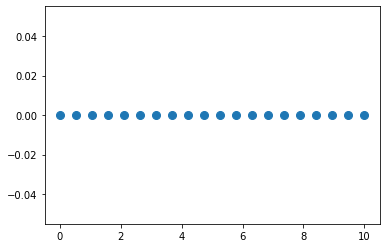

In [39]:
plot_linspace(20)

#### np.arange

`np.arange` is just like the python built in `range`, but it makes an array.

In [40]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [41]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

#### np.random.uniform & np.random.normal

The `np.random` subpackage contains some functions for creating arrays of random numbers.  These two are the most useful, but there are more (`random`, `randint`, `choice`)!

In [43]:
np.random.uniform(low=0.0, high=10.0, size=10).round(2)

array([8.46, 5.09, 6.39, 5.83, 4.98, 4.85, 0.51, 2.77, 7.85, 4.8 ])

In [44]:
def plot_uniform():
    unif = np.random.uniform(low=0.0, high=10.0, size=10**6)
    fig, ax = plt.subplots(figsize=(10, 4))
    _ = ax.hist(unif, bins=100, color="slateblue")

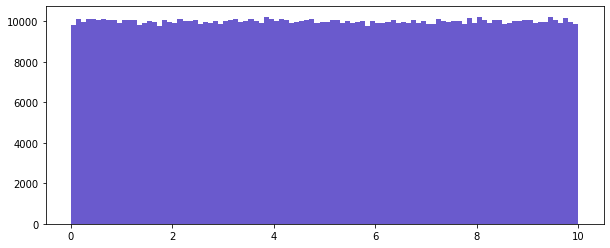

In [45]:
plot_uniform()

In [46]:
np.random.normal(loc=0.0, scale=1.0, size=10).round(2)

array([-0.81,  0.72, -0.7 ,  0.59, -1.29,  0.94,  0.48, -0.34,  0.04,
       -1.4 ])

In [47]:
def plot_normal():
    norm = np.random.normal(loc=0.0, scale=1.0, size=10**6)

    fig, ax = plt.subplots(figsize=(10, 4))
    _ = ax.hist(norm, bins=100, color="slateblue")

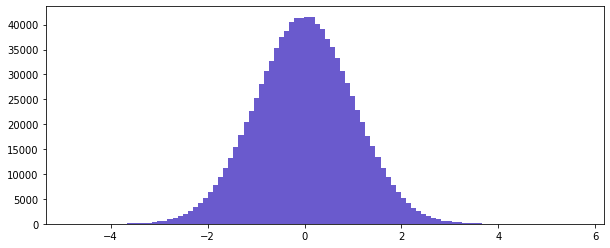

In [48]:
plot_normal()

## Check for Understanding

* What is the difference between `linspace` and `arange`?
<br>

* Name one thing that you can accomplish with arrays that you cannot accomplish with lists
<br>

* Name one thing you can do to a list that you cannot do to an array
<br>

* Critical thinking: Are arrays mutable?

* What is the difference between `linspace` and `arange`?

    **`linspace` gives you an array of numbers between two inclusive endpoints with a specified number of elements, while `arange` gives you an array between included left end and excluded right end with a specified spacing**


* Name one thing that you can accomplish with arrays that you cannot accomplish with lists

    **You can multi-index into an array, which you cannot do into a list**


* Name one thing you can do to a list that you cannot do to an array

    **You cannot append items to or change the shape of an array after it is instantiated**


* Critical thinking: Are arrays mutable?

    **They are mutable - just not as flexible as lists. As we saw above, you can swap out individual elements**

## Indexing Numpy Arrays

Numpy arrays support all the usual indexing shenanigans that lists do, so we won't comment on those any more.

### Indexing Multi-dimensional Arrays

The usual list style indexing extends to multi-dimensional arrays:

In [ ]:
x = np.arange(20).reshape((5, 4))
x

In [ ]:
# First two rows.
x[:2, :]

In [ ]:
# First two columns.
x[:, :2]

In [ ]:
# First two rows and first two columns
x[:2, :2]

In [ ]:
# Even numbered rows and columns
x[::2, ::2]

You can combine this with assignment to surgically alter arrays:

In [ ]:
x[:2, :2] = np.mean(x)
x

### Fancy Indexing

You can index an array with **another array** (or a list), and this is often referred to as **fancy indexing**.

In [ ]:
x = np.arange(0, 20, 2)
x

In [ ]:
x[[0, 0, 4, 4, 2, 2]]

In [ ]:
colors = np.array(["red", "blue"])
idx = np.array([0, 0, 1, 1, 0, 0, 1, 1])
colors[idx]

This also works for multi-dimensional arrays, but the results can be confusing.

In [ ]:
x = np.arange(20).reshape((5, 4))
x

In [ ]:
x[[0, 1, 2, 3], [0, 1, 2, 3]]

Again, you can use this to do surgery:

In [ ]:
x[[0, 1, 2, 3], [0, 1, 2, 3]] = 999
x

### Boolean Indexing

If you have an array of booleans (i.e.,`True`'s and `False`'s), you can use these as indexes too.  You'll get a new array containing only those elements that line up with a `True` in your index array.

In [ ]:
x = np.arange(10)
x

In [ ]:
x[[True, True, False, False, True, True, False, False, True, True]]

This is **very** useful when combined with broadcasting to create boolean index arrays.

In [ ]:
x % 2 == 0

In [ ]:
# Subset to the even entries.
x[x % 2 == 0]

Note that it's easy to do the wrong thing here!

In [ ]:
# ???
x[x % 2]

Both of these are useful, depending on your intention.

You can also use this technique to select specific rows or columns in a multi-dimensional array:

In [ ]:
x = np.arange(20).reshape((5, 4))
x

In [ ]:
x[[True, False, True, True, False], :]

In [ ]:
x[:, [False, True, False, True]]

And, of course, this allows for some surgical operations:

In [ ]:
x[[True, False, True, True, False], :] = 999
x

## Linear Algebra with Numpy

### Vectors

A vector can be represented by an array of real numbers

$$\mathbf{x} = [x_1, x_2, \ldots, x_n]$$

Geometrically, a vector specifies the coordinates of the tip of the vector if the tail were placed at the origin

In [ ]:
x = np.arange(10)
x

In [ ]:
x.shape

Note that the shape is a tuple of length 1. This is a true one-dimensional array. 

One dimensional arrays are fine to interact with other one dimensional arrays, but sometimes cause confusion with matrix operations. 

To get expected results with matrix operations, you will often want to use **row vectors** or **column vectors** which are numpy arrays with a two dimensional shape - but one of the dimensions is 1. 

#### Row Vector

A row vector can be created by adding an extra bracket when creating your array

In [ ]:
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
x

In [ ]:
x.shape

You can also just create the 1D vector and do a reshape

In [ ]:
# -1 in this case just includes the rest of the size in that dimension
x = np.arange(10).reshape(1, -1)
x

#### Column Vector

A column vector can be created by creating a row vector, and transposing it.

In [ ]:
x = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]).T
x

In [ ]:
x.shape

Like row vectors, you can create the 1D vector and do a reshape

In [ ]:
# -1 in this case just includes the rest of the size in that dimension
x = np.arange(10).reshape(-1, 1)
x

### Matrices

An $n \times p$ matrix is an array of numbers with $n$ rows and $p$ columns:

$$
X =
  \begin{bmatrix}
    x_{11} & x_{12} & \cdots & x_{1p} \\
    x_{21} & x_{22} & \cdots & x_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \cdots & x_{np} 
  \end{bmatrix}
$$

$n$ = the number of subjects  
$p$ = the number of features

For the following $2 \times 3$ matrix
$$
X =
  \begin{bmatrix}
    1 & 2 & 3\\
    4 & 5 & 6
  \end{bmatrix}
$$

We can create in Python using NumPY

In [ ]:
X = np.array([[1,2,3], [4,5,6]])
print(X[1, 2])
print(X)
print(X.shape)

## Broadcasting

### Broadcasting: Equal Length Arrays

One of the most useful features of arrays is called **broadcasting**.  At its most basic, boradcasting means that any arithmetic operation applied to an array is interpreted as being applied **element by element**.

In [ ]:
x = np.array([1, 2, 3, 4, 5,  6])
y = np.array([2, 4, 6, 8, 10, 12])

In [ ]:
x + y

In [ ]:
x - y

In [ ]:
x * y

In [ ]:
y / x

In [ ]:
y % x

### Broadcasting With a Constant

This is all pretty clear cut when the arrays have the **same shape**, but it's more powerful that that.

You can replace one of the arrays with a **constant** and that constant will be treated as if it were an entire array:

In [ ]:
2 * x

In [ ]:
y / 2

In [ ]:
x % 2

You can also broadcast with comparison operators, this is **very useful** when combined with something we'll talk about later:

In [ ]:
x <= 3

In [ ]:
y / 2 == x

If you need to combine boolean arrays with logical operators, broadcasting also applys to the `&` (and) and `|` (or) operators:

In [ ]:
(x <= 2) | (x >= 5)

In [ ]:
(x >= 2) & (x <= 5)

### Broadcasting Multi-dimensional Arrays

Broadcasting also works for multi-dimensional arrays, but it takes some practice and getting used to.

#### Restrictions
Broadcasting can only be performed when the shape of each dimension in the arrays are equal and/or one has the dimension size of 1. 

In [ ]:
x = np.ones((5, 4))
x

The constant (scalar) case is the same as it ever was:

In [ ]:
2 * x

But now things get pretty intersting.  If you broadcast with a one dimensional array, cool stuff happens:

In [ ]:
b = np.array([1, 2, 3, 4])
x * b

Note that `b` must have the correct shape for this to happen; refer to the restrictions

In [ ]:
print("Shape of x:", x.shape)
print("Shape of b:", b.shape)

To get the same behaviour, but with the **rows** scaled, we need to do some gymnsatics.

In [ ]:
b = np.array([1, 2, 3, 4, 5])
x * b

This doesn't work because `x` is 2d and `b` is 1d.

In [ ]:
print("Shape of x:", x.shape)
print("Shape of b:", b.shape)

To get this to work, we need to rehsape `b`.

In [ ]:
b_reshaped = b.reshape((5, 1))

Note how the both first dimensions, **and the number of dimensions** of the arrays match now:

In [ ]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

In case the two arrays have the same number of dimensions, as long as the dimensions **either** match, or one of them is **exactly one**, the arrays will broadcast:

In [ ]:
x * b_reshaped

The unit length dimensions are **stretched** to until the arrays have the same shape, then they are broadcast.

**Note:** We could also accomplish the first example with the same reshape principle.

In [ ]:
b = np.array([1, 2, 3, 4])
b_reshaped = b.reshape((1, 4))

Note how all non-unit dimensions match:

In [ ]:
print("Shape of x         :", x.shape)
print("Shape of b_reshaped:", b_reshaped.shape)

So we can broadcast:

In [ ]:
x * b_reshaped

## Breakout

1. Create the numpy array `x` like `x = np.arange(1, 9)`
    * Use slicing to create arrays `a` and `b` that contain the first 4 and last 4 elements of x, respectively
    * Use masking to create arrays `c` and `d` that contain the odd and even elements of x, respectively
    * Turn `a` into a column vector
    * Add 5 to `b`
    * Elementwise multiply `c` by `d`
    
    
    
2. Instantiate matrices `A` and `B` like: `A = np.random.randint(1, 101, size = (10, 10))` and `B = np.identity(10)`. 
    * What happens when you multiply `A` and `B`? Is this what you expected?
    * Create matrix `A_subset` that contains the first 4 columns of `A`
    * **Challenge**: Create matrix `B_subset` that contains the even rows of `B`

Breakout questions 1

In [49]:
x = np.arange(1, 9)

In [50]:
a = x[:4]
b = x[4:]
print(a)
print(b)

[1 2 3 4]
[5 6 7 8]


In [ ]:
c = x[x%2 == 1]
d = x[x%2 == 0]
print(c)
print(d)

In [ ]:
a.reshape(-1, 1)

In [ ]:
b + 5

In [ ]:
c * d

Breakout questions 2

In [ ]:
A = np.random.randint(1, 101, size=(10, 10))
B = np.eye(10)

In [ ]:
A * B

In [ ]:
A_subset = A[:, :4]
A_subset

In [ ]:
evens_mask = (np.arange(10) % 2).astype(bool)
B[evens_mask, :]

## Array methods 
Arrays have many useful methods.

### Mathematical functions
Most of the day-to-day mathematical functions have representatives in numpy.

In [ ]:
x = np.linspace(0, 1, 11)
x

In [ ]:
np.exp(x)

In [ ]:
np.log(x)

In [ ]:
np.sin(2 * np.pi * x)

In [ ]:
np.cos(2 * np.pi * x)

In [ ]:
np.sqrt(x)

### Aggregations
You can take sums, averages, max/min etc for arrays and can choose to use the `axis` argument so analyze rows or columns

#### Sums and Averages

It's easy and efficient to take the sum or average (arithmatic mean) of an array:

In [ ]:
x = np.arange(10)
x

In [ ]:
np.sum(x)

In [ ]:
np.mean(x)

When dealing with a multi-dimensional array, the default behaviour is to consume the entire thing:

In [ ]:
x = np.arange(16).reshape((4, 4))
x

In [ ]:
np.sum(x)

But you can also do **row sums** and **column sums** by supplying an axis argument.

In [ ]:
np.sum(x, axis=0)

In [ ]:
np.sum(x, axis=1)

#### Maxmiums and Minimums

Maximums and minimums work pretty much the same way as sums and averages.

In [ ]:
np.random.seed(123)
x = np.random.randint(0, 100, size=10)
x

In [ ]:
np.max(x)

In [ ]:
np.min(x)

The behaviour for multi dimensional arrays is the same as before:

In [ ]:
np.random.seed(1234)

x = np.random.randint(0, 100, size=16).reshape((4, 4))
x

In [ ]:
# Column maximums
np.max(x, axis=0)

In [ ]:
# Row minimums
np.max(x, axis=1)

#### Argument Maximums and Minimums

Sometimes you don't need to know the maximum (or minimum), but **where the maxmium occurs**.  This operation is called **argument maximum**.

In [ ]:
x

In [ ]:
np.argmax(x, axis=0) ## the row index (axis=0) of the column maximum

In [ ]:
np.argmin(x, axis=1)

## Recap: Learning Objectives

* Compare and Contrast numpy arrays to python lists

* Be able to use numpy slicing, indexing, and boolean indexing operations

* Identify numpy arrays and matrices and their linear algebra counterparts

* Use numpy broadcasting with arrays (vectors and matrices)

* Use numpy to perform linear algebra operations like matrix multiplication

## Assignment

Your assignment will be to work with numpy matrices and arrays to perform slicing, indexing, and matrix operations.

[numpy assignment](https://learn-2.galvanize.com/cohorts/1895/blocks/600/content_files/01-numpy/01-numpy-assignment.md)